In [1]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass


    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        pass
        return

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """

        pass
        return

##### 【Problem 1 】 Assumption function

In [3]:
import numpy as np

class ScratchLogisticRegression():


    def __init__(self, num_iter, lr, bias, verbose):
       
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
      
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
       
        self.coef_ = None

    def _sigmoid(self, z):
      
        return 1 / (1 + np.exp(-z))

    def _linear_combination(self, X):
 
        return np.dot(X, self.coef_) + self.intercept_

    def fit(self, X, y, X_val=None, y_val=None):
        
         
        n_samples, n_features = X.shape

        
        if self.bias:
            self.intercept_ = np.random.rand(1)
            X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
            if X_val is not None:
                X_val = np.concatenate([X_val, np.ones((X_val.shape[0], 1))], axis=1)
            n_features += 1
        else:
            self.intercept_ = 0

       
        self.coef_ = np.random.rand(n_features)

        if self.verbose:
            
            print()
        pass


    def predict(self, X):
    

        pass
        return

    def predict_proba(self, X):
       

        pass
        return

##### 【Problem 2 】 Fastest descent method

In [4]:
import numpy as np

class ScratchLogisticRegression():
  

    def __init__(self, num_iter, lr, bias, verbose, l2_reg=0):
     
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.l2_reg = l2_reg 
      
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
    
        self.coef_ = None
        self.intercept_ = None

    def _sigmoid(self, z):
        
        return 1 / (1 + np.exp(-z))

    def _linear_combination(self, X):
       
        return np.dot(X, self.coef_) + self.intercept_

    def _gradient_descent(self, X, y, y_pred):
       
        n_samples = X.shape[0]
        grad = np.dot(X.T, (y_pred - y)) / n_samples

        
        if self.l2_reg > 0:
            grad[1:] += (self.l2_reg / n_samples) * self.coef_[1:]

        return grad

    def _compute_loss(self, y, y_pred):
      
        epsilon = 1e-10 
        loss = -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
       
        if self.l2_reg > 0:
            loss += (self.l2_reg / (2 * y.shape[0])) * np.sum(self.coef_[1:] ** 2)
        return loss


    def fit(self, X, y, X_val=None, y_val=None):
 
       
        n_samples, n_features = X.shape

        
        if self.bias:
            self.intercept_ = np.random.rand(1)
            X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
            if X_val is not None:
                X_val = np.concatenate([X_val, np.ones((X_val.shape[0], 1))], axis=1)
            n_features += 1
        else:
            self.intercept_ = 0

       
        self.coef_ = np.random.rand(n_features)

       
        for i in range(self.iter):
            
            y_train_pred_proba = self._sigmoid(self._linear_combination(X))

            # Ikikataa rudi hapa
            grad = self._gradient_descent(X, y, y_train_pred_proba)
            self.coef_ -= self.lr * grad

            # tustore losses hapa
            self.loss[i] = self._compute_loss(y, y_train_pred_proba)

            # 
            if X_val is not None and y_val is not None:
                y_val_pred_proba = self._sigmoid(self._linear_combination(X_val))
                self.val_loss[i] = self._compute_loss(y_val, y_val_pred_proba)

            # 
            if self.verbose and i % 10 == 0:
                print(f"Iteration {i}, Loss: {self.loss[i]}, Val Loss: {self.val_loss[i] if X_val is not None else None}")

        if self.verbose:
            print("Learning finished.")


    def predict(self, X):
      
        if self.bias:
            X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)

    def predict_proba(self, X):
        
        if self.bias:
            X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
        linear_output = self._linear_combination(X)
        return self._sigmoid(linear_output)

##### 【Problem 3 】 Estimated

In [5]:
import numpy as np

class ScratchLogisticRegression():
 

    def __init__(self, num_iter, lr, bias, verbose, l2_reg=0):
    
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.l2_reg = l2_reg 
       
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
      
        self.coef_ = None
        self.intercept_ = None

    def _sigmoid(self, z):
        
        return 1 / (1 + np.exp(-z))

    def _linear_combination(self, X):
        
        return np.dot(X, self.coef_) + self.intercept_

    def _gradient_descent(self, X, y, y_pred):
        
        n_samples = X.shape[0]
        grad = np.dot(X.T, (y_pred - y)) / n_samples

       
        if self.l2_reg > 0:
            grad[1:] += (self.l2_reg / n_samples) * self.coef_[1:]

        return grad

    def _compute_loss(self, y, y_pred):

        epsilon = 1e-10  
        loss = -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
        
        if self.l2_reg > 0:
            loss += (self.l2_reg / (2 * y.shape[0])) * np.sum(self.coef_[1:] ** 2)
        return loss


    def fit(self, X, y, X_val=None, y_val=None):

        n_samples, n_features = X.shape

        
        if self.bias:
            self.intercept_ = np.random.rand(1)
            X_with_bias = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
            if X_val is not None:
                X_val_with_bias = np.concatenate([X_val, np.ones((X_val.shape[0], 1))], axis=1)
            else:
                X_val_with_bias = None
            n_features += 1
        else:
            self.intercept_ = 0
            X_with_bias = X
            X_val_with_bias = X_val

       
        self.coef_ = np.random.rand(n_features)

       
        for i in range(self.iter):
            
            y_train_pred_proba = self._sigmoid(self._linear_combination(X_with_bias))

            
            grad = self._gradient_descent(X_with_bias, y, y_train_pred_proba)
            self.coef_ -= self.lr * grad

         
            self.loss[i] = self._compute_loss(y, y_train_pred_proba)

            
            if X_val_with_bias is not None and y_val is not None:
                y_val_pred_proba = self._sigmoid(self._linear_combination(X_val_with_bias))
                self.val_loss[i] = self._compute_loss(y_val, y_val_pred_proba)

            
            if self.verbose and i % 10 == 0:
                print(f"Iteration {i}, Loss: {self.loss[i]}, Val Loss: {self.val_loss[i] if X_val is not None else None}")

        if self.verbose:
            print("Learning finished.")


    def predict_proba(self, X):
 
        if self.bias:
            X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
        linear_output = self._linear_combination(X)
        return self._sigmoid(linear_output)

    def predict(self, X, threshold=0.5):

        proba = self.predict_proba(X)
        return (proba >= threshold).astype(int).flatten()

##### 【Problem 4 】 Purpose function

In [6]:
def _compute_loss(self, y, y_pred):
        """
        損失関数（交差エントロピー誤差）の計算

        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples, )
            正解ラベル
        y_pred : 次の形のndarray, shape (n_samples, )
            予測確率

        Returns
        -------
          float
          損失関数の値
        """
        epsilon = 1e-10  # log(0)を防ぐための微小な値
        loss = -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
        # L2正則化の項を加える
        if self.l2_reg > 0:
            loss += (self.l2_reg / (2 * y.shape[0])) * np.sum(self.coef_[1:] ** 2)
        return loss

##### 【Problem 5 】 Learning and estimation

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Filter for virgicolor (label 1) and virginica (label 2)
X_binary = X[y >= 1]
y_binary = y[y >= 1]
y_binary[y_binary == 1] = 0  # Map virgicolor to 0
y_binary[y_binary == 2] = 1  # Map virginica to 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train your Scratch Logistic Regression model
scratch_lr = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=False, l2_reg=0.01)
scratch_lr.fit(X_train_scaled, y_train)
scratch_pred_scratch = scratch_lr.predict(X_test_scaled)
scratch_proba_scratch = scratch_lr.predict_proba(X_test_scaled)

# Initialize and train scikit-learn's Logistic Regression model
sklearn_lr = SklearnLogisticRegression(penalty='l2', C=1/0.01, solver='liblinear') # Adjust parameters to be similar
sklearn_lr.fit(X_train_scaled, y_train)
sklearn_pred_sklearn = sklearn_lr.predict(X_test_scaled)
sklearn_proba_sklearn = sklearn_lr.predict_proba(X_test_scaled)[:, 1] # Probability of class 1

# Evaluate performance of your Scratch model
scratch_accuracy = accuracy_score(y_test, scratch_pred_scratch)
scratch_precision = precision_score(y_test, scratch_pred_scratch)
scratch_recall = recall_score(y_test, scratch_pred_scratch)

print("--- Scratch Logistic Regression ---")
print(f"Accuracy:  {scratch_accuracy:.4f}")
print(f"Precision: {scratch_precision:.4f}")
print(f"Recall:    {scratch_recall:.4f}")
print(f"Learned Coefficients: {scratch_lr.coef_}")
if scratch_lr.bias:
    print(f"Learned Intercept: {scratch_lr.intercept_}")

# Evaluate performance of scikit-learn's model
sklearn_accuracy = accuracy_score(y_test, sklearn_pred_sklearn)
sklearn_precision = precision_score(y_test, sklearn_pred_sklearn)
sklearn_recall = recall_score(y_test, sklearn_pred_sklearn)

print("\n--- Scikit-learn Logistic Regression ---")
print(f"Accuracy:  {sklearn_accuracy:.4f}")
print(f"Precision: {sklearn_precision:.4f}")
print(f"Recall:    {sklearn_recall:.4f}")
print(f"Learned Coefficients: {sklearn_lr.coef_}")
print(f"Learned Intercept: {sklearn_lr.intercept_}")

--- Scratch Logistic Regression ---
Accuracy:  0.9333
Precision: 0.9231
Recall:    0.9231
Learned Coefficients: [ 0.35063516 -0.26765652  1.20561705  1.51739252 -0.23312479]
Learned Intercept: [0.51793067]

--- Scikit-learn Logistic Regression ---
Accuracy:  0.8667
Precision: 0.8462
Recall:    0.8462
Learned Coefficients: [[-1.89043437 -3.29722551  8.50061985  6.63792586]]
Learned Intercept: [-0.05090252]


##### 【Problem 6 】 Learning curve plot

Iteration 0, Loss: 0.3901046247004453, Val Loss: 0.32229397444573404
Iteration 10, Loss: 0.3842182041904212, Val Loss: 0.31607444226377696
Iteration 20, Loss: 0.3785264318606008, Val Loss: 0.3100982555866652
Iteration 30, Loss: 0.37301944133530496, Val Loss: 0.3043521806677886
Iteration 40, Loss: 0.36768804094526153, Val Loss: 0.29882390867671854
Iteration 50, Loss: 0.3625236570396351, Val Loss: 0.2935019780837618
Iteration 60, Loss: 0.3575182828161322, Val Loss: 0.2883757045051181
Iteration 70, Loss: 0.3526644320676008, Val Loss: 0.2834351172129428
Iteration 80, Loss: 0.347955097315307, Val Loss: 0.2786709016060886
Iteration 90, Loss: 0.34338371186167893, Val Loss: 0.27407434701786876
Iteration 100, Loss: 0.3389441153499782, Val Loss: 0.26963729930809294
Iteration 110, Loss: 0.3346305224661316, Val Loss: 0.2653521177490264
Iteration 120, Loss: 0.33043749445975507, Val Loss: 0.2612116357698551
Iteration 130, Loss: 0.3263599131980085, Val Loss: 0.25720912517260197
Iteration 140, Loss: 0

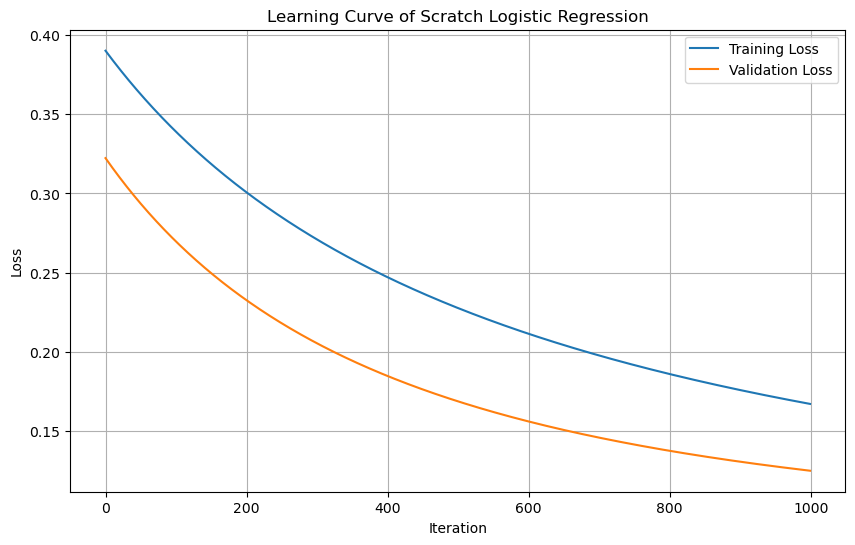

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Filter for virgicolor (label 1) and virginica (label 2)
X_binary = X[y >= 1]
y_binary = y[y >= 1]
y_binary[y_binary == 1] = 0  # Map virgicolor to 0
y_binary[y_binary == 2] = 1  # Map virginica to 1

# Split the data into training and testing sets (let's use a validation split here)
X_train, X_temp, y_train, y_temp = train_test_split(X_binary, y_binary, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize and train your Scratch Logistic Regression model with verbose=True
num_iterations = 1000
learning_rate = 0.01
l2_regularization = 0.01
scratch_lr = ScratchLogisticRegression(num_iter=num_iterations, lr=learning_rate, bias=True, verbose=True, l2_reg=l2_regularization)
scratch_lr.fit(X_train_scaled, y_train, X_val_scaled, y_val)
scratch_pred_scratch = scratch_lr.predict(X_test_scaled)
scratch_proba_scratch = scratch_lr.predict_proba(X_test_scaled)

# Initialize and train scikit-learn's Logistic Regression model
sklearn_lr = SklearnLogisticRegression(penalty='l2', C=1/l2_regularization, solver='liblinear') # Adjust parameters to be similar
sklearn_lr.fit(X_train_scaled, y_train)
sklearn_pred_sklearn = sklearn_lr.predict(X_test_scaled)
sklearn_proba_sklearn = sklearn_lr.predict_proba(X_test_scaled)[:, 1] # Probability of class 1

# Evaluate performance of your Scratch model
scratch_accuracy = accuracy_score(y_test, scratch_pred_scratch)
scratch_precision = precision_score(y_test, scratch_pred_scratch)
scratch_recall = recall_score(y_test, scratch_pred_scratch)

print("\n--- Scratch Logistic Regression ---")
print(f"Accuracy:  {scratch_accuracy:.4f}")
print(f"Precision: {scratch_precision:.4f}")
print(f"Recall:    {scratch_recall:.4f}")
print(f"Learned Coefficients: {scratch_lr.coef_}")
if scratch_lr.bias:
    print(f"Learned Intercept: {scratch_lr.intercept_}")

# Evaluate performance of scikit-learn's model
sklearn_accuracy = accuracy_score(y_test, sklearn_pred_sklearn)
sklearn_precision = precision_score(y_test, sklearn_pred_sklearn)
sklearn_recall = recall_score(y_test, sklearn_pred_sklearn)

print("\n--- Scikit-learn Logistic Regression ---")
print(f"Accuracy:  {sklearn_accuracy:.4f}")
print(f"Precision: {sklearn_precision:.4f}")
print(f"Recall:    {sklearn_recall:.4f}")
print(f"Learned Coefficients: {sklearn_lr.coef_}")
print(f"Learned Intercept: {sklearn_lr.intercept_}")

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(scratch_lr.iter), scratch_lr.loss, label='Training Loss')
if np.any(scratch_lr.val_loss):
    plt.plot(range(scratch_lr.iter), scratch_lr.val_loss, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning Curve of Scratch Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

##### 【Problem 7 】 Visualization of decision area

C:\Users\ericg\AppData\Local\Temp\ipykernel_27260\3985103911.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


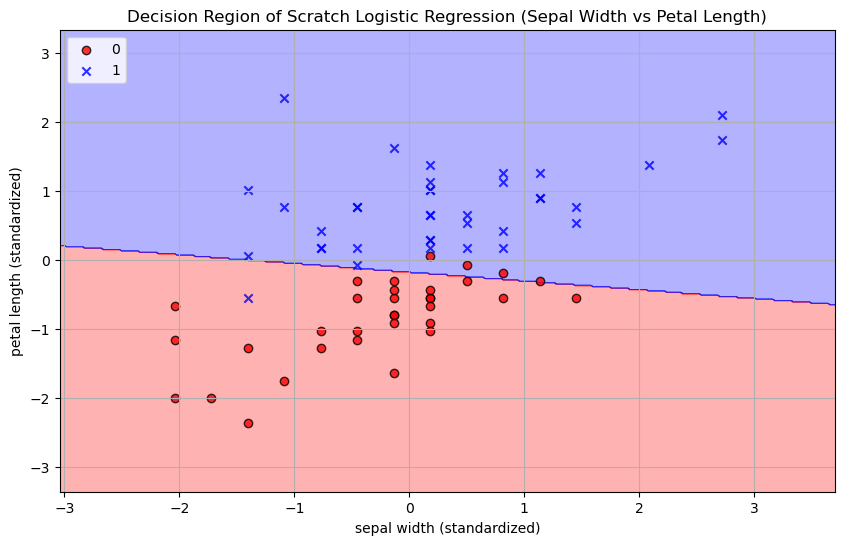

C:\Users\ericg\AppData\Local\Temp\ipykernel_27260\3985103911.py:35: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


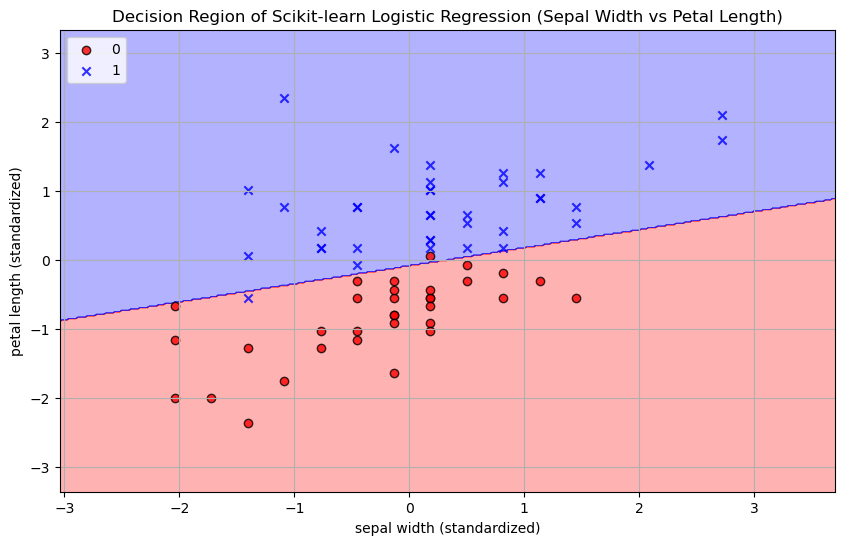

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
   
    markers = ('o', 'x', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1


    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))


    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

  
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, [1, 2]]  # Use sepal width (index 1) and petal length (index 2)
y = iris.target

# Filter for virgicolor (label 1) and virginica (label 2)
X_binary = X[y >= 1]
y_binary = y[y >= 1]
y_binary[y_binary == 1] = 0  # Map virgicolor to 0
y_binary[y_binary == 2] = 1  # Map virginica to 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train your Scratch Logistic Regression model (on two features)
scratch_lr_viz = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=False, l2_reg=0.01)
scratch_lr_viz.fit(X_train_scaled, y_train)

# Initialize and train scikit-learn's Logistic Regression model (on two features)
sklearn_lr_viz = SklearnLogisticRegression(penalty='l2', C=1/0.01, solver='liblinear')
sklearn_lr_viz.fit(X_train_scaled, y_train)

# Plot the decision regions for your Scratch model
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_scaled, y_train, classifier=scratch_lr_viz, resolution=0.02)
plt.xlabel('sepal width (standardized)')
plt.ylabel('petal length (standardized)')
plt.title('Decision Region of Scratch Logistic Regression (Sepal Width vs Petal Length)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plot the decision regions for scikit-learn's model
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_scaled, y_train, classifier=sklearn_lr_viz, resolution=0.02)
plt.xlabel('sepal width (standardized)')
plt.ylabel('petal length (standardized)')
plt.title('Decision Region of Scikit-learn Logistic Regression (Sepal Width vs Petal Length)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

##### 【Problem 8 】 (Advance Challenge) Save Weight

--- Scratch Logistic Regression ---
Accuracy:  0.9000
Precision: 0.9167
Recall:    0.8462
Learned Coefficients: [ 0.43952977  0.00639635  1.17754798  1.49735853 -0.23709   ]
Learned Intercept: [0.71319333]

--- Scikit-learn Logistic Regression ---
Accuracy:  0.8667
Precision: 0.8462
Recall:    0.8462
Learned Coefficients: [[-1.89043437 -3.29722551  8.50061985  6.63792586]]
Learned Intercept: [-0.05090252]


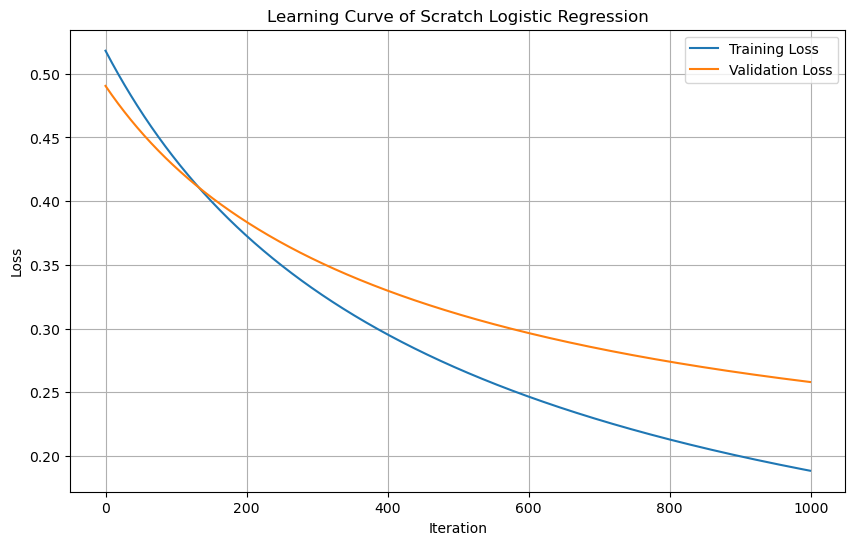

C:\Users\ericg\AppData\Local\Temp\ipykernel_27260\3039433505.py:168: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\ericg\AppData\Local\Temp\ipykernel_27260\3039433505.py:168: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


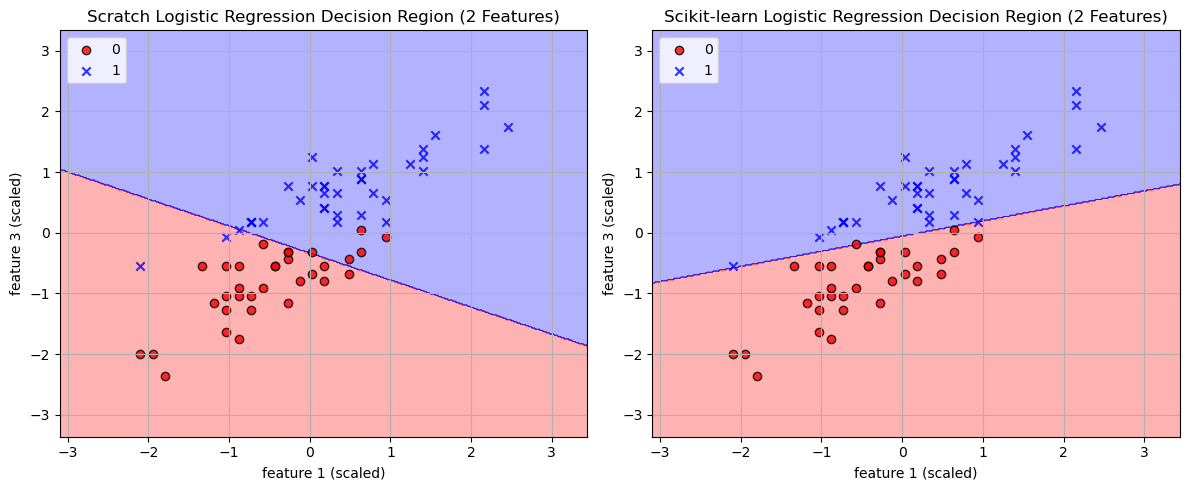

Weights saved to model_weights.pkl (pickle format)
Weights saved to model_weights.npz (NumPy npz format)
Weights loaded from model_weights.pkl (pickle format)

--- Loaded Scratch Logistic Regression ---
Loaded Coefficients: [ 0.43952977  0.00639635  1.17754798  1.49735853 -0.23709   ]
Loaded Intercept: [0.71319333]


In [10]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib.colors import ListedColormap

class ScratchLogisticRegression():
    """
    Logistic Regression implementation from scratch.

    Parameters
    ----------
    num_iter : int
      Number of iterations for gradient descent.
    lr : float
      Learning rate.
    bias : bool
      Whether to include a bias term.
    verbose : bool
      Whether to print the learning process.

    Attributes
    ----------
    self.coef_ : ndarray, shape (n_features,)
      Parameters (weights).
    self.loss : ndarray, shape (self.iter,)
      Record of training loss.
    self.val_loss : ndarray, shape (self.iter,)
      Record of validation loss.

    """

    def __init__(self, num_iter, lr, bias, verbose, l2_reg=0):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.l2_reg = l2_reg
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.coef_ = None
        self.intercept_ = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _linear_combination(self, X):
        return np.dot(X, self.coef_) + self.intercept_

    def _gradient_descent(self, X, y, y_pred):
        n_samples = X.shape[0]
        grad = np.dot(X.T, (y_pred - y)) / n_samples
        if self.l2_reg > 0 and self.coef_ is not None:
            grad[1:] += (self.l2_reg / n_samples) * self.coef_[1:]
        return grad

    def _compute_loss(self, y, y_pred):
        epsilon = 1e-10
        loss = -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
        if self.l2_reg > 0 and self.coef_ is not None:
            loss += (self.l2_reg / (2 * y.shape[0])) * np.sum(self.coef_[1:] ** 2)
        return loss

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features_original = X.shape
        X_augmented = np.copy(X)
        if self.bias:
            self.intercept_ = np.random.rand(1)
            X_augmented = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
            if X_val is not None:
                X_val = np.concatenate([X_val, np.ones((X_val.shape[0], 1))], axis=1)
            n_features = n_features_original + 1
        else:
            self.intercept_ = 0
            n_features = n_features_original

        self.coef_ = np.random.rand(n_features)

        for i in range(self.iter):
            y_train_pred_proba = self._sigmoid(self._linear_combination(X_augmented))
            grad = self._gradient_descent(X_augmented, y, y_train_pred_proba)
            self.coef_ -= self.lr * grad
            self.loss[i] = self._compute_loss(y, y_train_pred_proba)

            if X_val is not None and y_val is not None:
                y_val_pred_proba = self._sigmoid(self._linear_combination(X_val))
                self.val_loss[i] = self._compute_loss(y_val, y_val_pred_proba)

            if self.verbose and i % 10 == 0:
                print(f"Iteration {i}, Loss: {self.loss[i]}, Val Loss: {self.val_loss[i] if X_val is not None else None}")

        if self.verbose:
            print("Learning finished.")

    def predict_proba(self, X):
        if self.bias:
            X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
        linear_output = self._linear_combination(X)
        return self._sigmoid(linear_output)

    def predict(self, X, threshold=0.5):
        proba = self.predict_proba(X)
        return (proba >= threshold).astype(int).flatten()

    def save_weights(self, filepath_pickle='model_weights.pkl', filepath_numpy='model_weights.npz'):
        model_data = {'coef_': self.coef_, 'intercept_': self.intercept_, 'bias': self.bias}
        with open(filepath_pickle, 'wb') as f:
            pickle.dump(model_data, f)
        print(f"Weights saved to {filepath_pickle} (pickle format)")

        if self.bias:
            np.savez(filepath_numpy, coef=self.coef_[:-1], intercept=self.coef_[-1], bias=self.bias)
        else:
            np.savez(filepath_numpy, coef=self.coef_, intercept=self.intercept_, bias=self.bias)
        print(f"Weights saved to {filepath_numpy} (NumPy npz format)")

    def load_weights(self, filepath_pickle='model_weights.pkl', filepath_numpy='model_weights.npz'):
        try:
            with open(filepath_pickle, 'rb') as f:
                loaded_data = pickle.load(f)
                self.coef_ = loaded_data['coef_']
                self.intercept_ = loaded_data['intercept_']
                self.bias = loaded_data['bias']
            print(f"Weights loaded from {filepath_pickle} (pickle format)")
            return
        except FileNotFoundError:
            print(f"Pickle file not found at {filepath_pickle}. Trying NumPy format...")
        except Exception as e:
            print(f"Error loading from pickle file: {e}. Trying NumPy format...")

        try:
            loaded_data_npz = np.load(filepath_numpy)
            self.coef_ = loaded_data_npz['coef']
            self.intercept_ = loaded_data_npz['intercept'].item() if 'intercept' in loaded_data_npz else 0
            self.bias = loaded_data_npz['bias'].item() if 'bias' in loaded_data_npz else False
            if self.bias and self.intercept_ is not None:
                self.coef_ = np.append(self.coef_, self.intercept_)
                self.intercept_ = None
            print(f"Weights loaded from {filepath_numpy} (NumPy npz format)")
        except FileNotFoundError:
            print(f"NumPy npz file not found at {filepath_numpy}.")
        except Exception as e:
            print(f"Error loading from NumPy npz file: {e}")

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('o', 'x', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

if __name__ == '__main__':
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Filter for virgicolor (label 1) and virginica (label 2)
    X_binary = X[y >= 1]
    y_binary = y[y >= 1]
    y_binary[y_binary == 1] = 0
    y_binary[y_binary == 2] = 1

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train your Scratch Logistic Regression model
    scratch_lr = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=False, l2_reg=0.01)
    scratch_lr.fit(X_train_scaled, y_train, X_test_scaled, y_test)
    scratch_pred_scratch = scratch_lr.predict(X_test_scaled)
    scratch_proba_scratch = scratch_lr.predict_proba(X_test_scaled)

    # Evaluate Scratch model
    scratch_accuracy = accuracy_score(y_test, scratch_pred_scratch)
    scratch_precision = precision_score(y_test, scratch_pred_scratch)
    scratch_recall = recall_score(y_test, scratch_pred_scratch)

    print("--- Scratch Logistic Regression ---")
    print(f"Accuracy:  {scratch_accuracy:.4f}")
    print(f"Precision: {scratch_precision:.4f}")
    print(f"Recall:    {scratch_recall:.4f}")
    print(f"Learned Coefficients: {scratch_lr.coef_}")
    if scratch_lr.bias and scratch_lr.intercept_ is not None:
        print(f"Learned Intercept: {scratch_lr.intercept_}")
    elif scratch_lr.bias and scratch_lr.coef_ is not None:
        print(f"Learned Intercept (from coef): {scratch_lr.coef_[-1]}")
    elif not scratch_lr.bias:
        print(f"Bias is False, intercept is 0.")

    # Train scikit-learn's Logistic Regression model
    sklearn_lr = SklearnLogisticRegression(penalty='l2', C=1/0.01, solver='liblinear')
    sklearn_lr.fit(X_train_scaled, y_train)
    sklearn_pred_sklearn = sklearn_lr.predict(X_test_scaled)
    sklearn_proba_sklearn = sklearn_lr.predict_proba(X_test_scaled)[:, 1]

    # Evaluate scikit-learn model
    sklearn_accuracy = accuracy_score(y_test, sklearn_pred_sklearn)
    sklearn_precision = precision_score(y_test, sklearn_pred_sklearn)
    sklearn_recall = recall_score(y_test, sklearn_pred_sklearn)

    print("\n--- Scikit-learn Logistic Regression ---")
    print(f"Accuracy:  {sklearn_accuracy:.4f}")
    print(f"Precision: {sklearn_precision:.4f}")
    print(f"Recall:    {sklearn_recall:.4f}")
    print(f"Learned Coefficients: {sklearn_lr.coef_}")
    print(f"Learned Intercept: {sklearn_lr.intercept_}")

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(scratch_lr.iter), scratch_lr.loss, label='Training Loss')
    if np.any(scratch_lr.val_loss):
        plt.plot(range(scratch_lr.iter), scratch_lr.val_loss, label='Validation Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Learning Curve of Scratch Logistic Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Visualization of decision area (using two features)
    X_train_2d = X_train_scaled[:, [0, 2]] # Using first and third scaled features
    X_test_2d = X_test_scaled[:, [0, 2]]

    scratch_lr_viz = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=False, l2_reg=0.01)
    scratch_lr_viz.fit(X_train_2d, y_train)

    sklearn_lr_viz = SklearnLogisticRegression(penalty='l2', C=1/0.01, solver='liblinear')
    sklearn_lr_viz.fit(X_train_2d, y_train)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plot_decision_regions(X_train_2d, y_train, classifier=scratch_lr_viz)
    plt.xlabel('feature 1 (scaled)')
    plt.ylabel('feature 3 (scaled)')
    plt.title('Scratch Logistic Regression Decision Region (2 Features)')
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plot_decision_regions(X_train_2d, y_train, classifier=sklearn_lr_viz)
    plt.xlabel('feature 1 (scaled)')
    plt.ylabel('feature 3 (scaled)')
    plt.title('Scikit-learn Logistic Regression Decision Region (2 Features)')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Save and load weights
    scratch_lr.save_weights()
    loaded_lr = ScratchLogisticRegression(num_iter=100, lr=0.01, bias=True, verbose=False, l2_reg=0.01)
    loaded_lr.load_weights()

    print("\n--- Loaded Scratch Logistic Regression ---")
    print(f"Loaded Coefficients: {loaded_lr.coef_}")
    if loaded_lr.bias and loaded_lr.intercept_ is not None:
        print(f"Loaded Intercept: {loaded_lr.intercept_}")
    elif loaded_lr.bias and loaded_lr.coef_ is not None:
        print(f"Loaded Intercept (from coef): {loaded_lr.coef_[-1]}")
    elif not loaded_lr.bias:
        print(f"Bias is False, intercept is 0.")